<a href="https://colab.research.google.com/github/ssarwar035/I310-Project_Poverty-Levels-by-Race-and-Gender/blob/main/I310D_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Black women black men
White women white men
create 4 predictive models

1973-2000 for training the dataset
2000-2020 for predicted model

# **CLEANING**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('poverty_level_wages.csv')

# sort in ascending order by year
print(type(df.year[0]))
df.sort_values(by='year')


<class 'numpy.int64'>


,year,annual_poverty-level_wage,hourly_poverty-level_wage,0-75%_of_poverty_wages,75-100%_of_poverty_wages,share_below_poverty_wages,100-125%_of_poverty_wages,125-200%_of_poverty_wages,200-300%_of_poverty_wages,300%+_of_poverty_wages,...,women_300%+_of_poverty_wages,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
49,1973,4701,2.26,9.3,16.3,25.6,12.7,32.9,19.8,9.0,...,2.4,23.8,13.7,38.5,37.3,25.3,50.6,34.9,27.1,48.2
48,1974,5158,2.48,7.5,16.8,24.3,15.2,31.0,20.6,8.9,...,2.3,22.7,12.8,37.0,34.6,22.8,47.4,33.7,24.5,49.7
47,1975,5595,2.69,10.2,15.7,25.9,13.9,32.0,19.5,8.7,...,2.5,24.2,14.4,38.2,36.7,25.1,49.1,35.0,27.3,47.5
46,1976,5914,2.84,7.1,18.0,25.1,15.2,31.2,19.6,9.0,...,2.8,23.6,14.1,36.7,34.8,23.8,46.2,34.8,27.2,46.3
45,1977,6284,3.02,6.2,20.7,26.9,13.6,30.3,20.5,8.7,...,2.4,25.4,15.5,38.7,36.7,28.0,45.7,36.0,25.6,52.8
44,1978,6718,3.23,5.4,20.6,26.0,15.4,29.6,19.9,9.1,...,2.3,24.5,14.7,37.5,35.5,25.2,46.0,32.6,23.8,46.5
43,1979,7360,3.54,5.1,20.7,25.8,13.6,31.1,20.7,8.9,...,2.4,24.3,14.3,37.3,33.7,25.1,42.9,34.6,25.1,49.6
42,1980,8181,3.93,4.6,21.1,25.7,13.8,31.8,19.9,8.8,...,2.4,24.2,14.4,36.5,34.1,25.3,43.0,33.6,25.3,46.5
41,1981,8956,4.31,5.3,22.5,27.8,14.4,29.1,20.5,8.2,...,2.4,26.2,16.4,38.4,35.7,26.8,44.7,37.1,29.1,49.4
40,1982,9499,4.57,10.6,17.6,28.3,13.5,29.4,19.7,9.1,...,2.8,26.6,17.3,37.8,36.9,29.3,44.4,37.5,30.6,47.7


Extracting the required rows

In [4]:
df_filtered = df[["year", "annual_poverty-level_wage", "white_share_below_poverty_wages", "white_men_share_below_poverty_wages", "white_women_share_below_poverty_wages", "black_share_below_poverty_wages", "black_men_share_below_poverty_wages", "black_women_share_below_poverty_wages", "hispanic_share_below_poverty_wages", "hispanic_men_share_below_poverty_wages", "hispanic_women_share_below_poverty_wages"]]
df_filtered

,year,annual_poverty-level_wage,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
0,2022,27733,10.7,8.1,13.5,16.2,14.5,17.7,15.4,12.3,19.2
1,2021,25688,11.1,8.7,13.8,18.0,15.7,19.9,16.8,14.2,20.0
2,2020,24544,10.4,7.9,13.1,18.1,15.4,20.5,14.9,12.0,18.6
3,2019,24242,13.4,10.5,16.6,22.3,19.2,24.9,19.7,15.8,24.6
4,2018,23809,15.0,11.6,18.7,26.0,23.1,28.5,24.3,19.3,30.7
5,2017,23244,16.8,13.4,20.5,29.1,26.4,31.4,28.5,23.7,34.8
6,2016,22755,17.3,14.0,20.8,28.8,25.1,32.0,29.2,24.7,35.1
7,2015,22464,18.9,15.2,22.9,31.8,28.3,34.8,33.5,29.1,39.2
8,2014,22422,20.2,16.0,24.6,32.4,30.2,34.3,36.2,31.7,42.1
9,2013,22048,20.8,16.9,24.9,31.9,29.0,34.4,38.2,34.8,42.7


Text(0.5, 1.0, 'Wages of indivdiuals below Poverty Line in United States (1973-2022)')

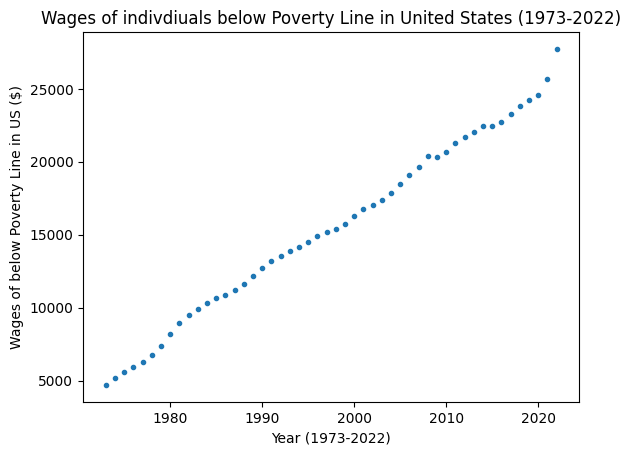

In [ ]:
year = df["year"]
below_poverty_wage = df["annual_poverty-level_wage"]

plt.scatter(year,below_poverty_wage, marker=".")

plt.xlabel("Year (1973-2022)")
plt.ylabel("Wages of below Poverty Line in US ($)")

plt.title("Wages of indivdiuals below Poverty Line in United States (1973-2022)")